Plotting, using SVG:

In [7]:
using PyPlot

PyPlot.svg(true)

true

We discussed a simple model in class, where we have a circuit with two resistors in series, a battery, and an ammeter.  The ammeter makes a (noisy) measurement of the current $I$ flowing through the circuit; the battery is at voltage $V$; one of the resistors has been calibrated and is adjustable by us; and we want to measure the resistance, $R$ of the other resistor.  Let the setting of the adjustable resistor be $x$, and the measured current $y$; then we have 
$$
y = I + \mathrm{noise} = \frac{V}{R + x} + \mathrm{noise}.
$$

If we model the noise as a Gaussian with zero mean and unknown standard deviation, $\sigma$, then we have three parameters ($V$, $R$, $\sigma$) to measure.  We have 
$$
y = \frac{V}{R + x} + \epsilon
$$
with $\epsilon \sim N(0,\sigma)$.  Under repeated measurements (assuming statistically independent noise on each measurement) with different settings of $x$, we obtain a data set $\left( y_i, x_i \right)$ whose likelihood is 
$$
p\left( \left\{ x_i, y_i \right\} \mid V, R, \sigma \right) = \prod_{i=1}^{N} \frac{1}{\sqrt{2\pi} \sigma} \exp\left[ -\frac{1}{2} \left( \frac{\frac{V}{R + x_i} - y_i}{\sigma} \right)^2 \right]
$$

Here we will construct a MCMC sampler for $V,R,\sigma$ given such a data set.  First, to generate mock data, we choose true values of the parameters:

In [8]:
Rtrue = 1000.0
Vtrue = 3.0
sigma_true = 1e-4

0.0001

Now we choose a large number of dial settings (it will be 

In [10]:
xs = exp.(collect(log(Rtrue/10):0.1:log(10*Rtrue)))
ys = Vtrue./(Rtrue .+ xs) .+ sigma_true.*randn(length(xs));

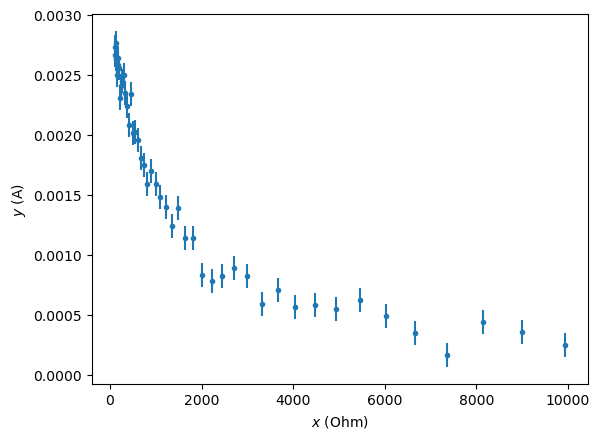

PyObject Text(28.0, 0.5, '$y$ ($\\mathrm{A}$)')

In [14]:
errorbar(xs, ys, yerr=sigma_true, fmt=".")
xlabel(L"$x$ ($\mathrm{Ohm}$)")
ylabel(L"$y$ ($\mathrm{A}$)")